In [10]:
import datetime
import pandas_datareader as pdr
import pandas as pd

api_key='9ac8254a56e70dd558ce41190f35928190d0f2da' # <your OWN API token aka key goes here

# the new tickers 
tickers = ['TSLA', 'BSX', 'NVDA', 'ISRG']


start="2020-1-1"
end="2021-7-1"

df = pdr.tiingo.TiingoDailyReader(tickers, start=start, end=end, api_key=api_key)


all_data = df.read()
all_data

/Users/vasilina/opt/anaconda3/lib/python3.8/site-packages/pandas_datareader/tiingo.py:234: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  return pd.concat(dfs, self._concat_axis)


close     high       low    open    volume  \
symbol date                                                                     
TSLA   2020-01-02 00:00:00+00:00  430.26  430.700  421.7100  424.50   9532100   
       2020-01-03 00:00:00+00:00  443.01  454.000  436.9200  440.50  17778500   
       2020-01-06 00:00:00+00:00  451.54  451.560  440.0000  440.47  10133000   
       2020-01-07 00:00:00+00:00  469.06  471.630  453.3600  461.40  17882100   
       2020-01-08 00:00:00+00:00  492.14  498.490  468.2300  473.70  31144300   
...                                  ...      ...       ...     ...       ...   
ISRG   2021-06-25 00:00:00+00:00  908.35  912.185  903.6500  905.00    434468   
       2021-06-28 00:00:00+00:00  912.41  914.550  904.5000  909.78    415164   
       2021-06-29 00:00:00+00:00  920.72  926.040  910.9801  915.00    413768   
       2021-06-30 00:00:00+00:00  919.64  925.000  912.0200  920.05    539797   
       2021-07-01 00:00:00+00:00  927.46  928.000  916.4900  917.53    364534   

                                    adjClose     adjHigh      adjLow  \
symbol date                                                            
TSLA   2020-01-02 00:00:00+00:00   86.052000   86.140000   84.342000   
       2020-01-03 00:00:00+00:00   88.602000   90.800000   87.384000   
       2020-01-06 00:00:00+00:00   90.308000   90.312000   88.000000   
       2020-01-07 00:00:00+00:00   93.812000   94.326000   90.672000   
       2020-01-08 00:00:00+00:00   98.428000   99.698000   93.646000   
...                                      ...         ...         ...   
ISRG   2021-06-25 00:00:00+00:00  302.783333  304.061667  301.216667   
       2021-06-28 00:00:00+00:00  304.136667  304.850000  301.500000   
       2021-06-29 00:00:00+00:00  306.906667  308.680000  303.660033   
       2021-06-30 00:00:00+00:00  306.546667  308.333333  304.006667   
       2021-07-01 00:00:00+00:00  309.153333  309.333333  305.496667   

                                     adjOpen  adjVolume  divCash  splitFactor  
symbol date                                                                    
TSLA   2020-01-02 00:00:00+00:00   84.900000   47660500      0.0          1.0  
       2020-01-03 00:00:00+00:00   88.100000   88892500      0.0          1.0  
       2020-01-06 00:00:00+00:00   88.094000   50665000      0.0          1.0  
       2020-01-07 00:00:00+00:00   92.280000   89410500      0.0          1.0  
       2020-01-08 00:00:00+00:00   94.740000  155721500      0.0          1.0  
...                                      ...        ...      ...          ...  
ISRG   2021-06-25 00:00:00+00:00  301.666667    1303404      0.0          1.0  
       2021-06-28 00:00:00+00:00  303.260000    1245492      0.0          1.0  
       2021-06-29 00:00:00+00:00  305.000000    1241304      0.0          1.0  
       2021-06-30 00:00:00+00:00  306.683333    1619391      0.0          1.0  
       2021-07-01 00:00:00+00:00  305.843333    1093602      0.0          1.0  

[1512 rows x 12 columns]

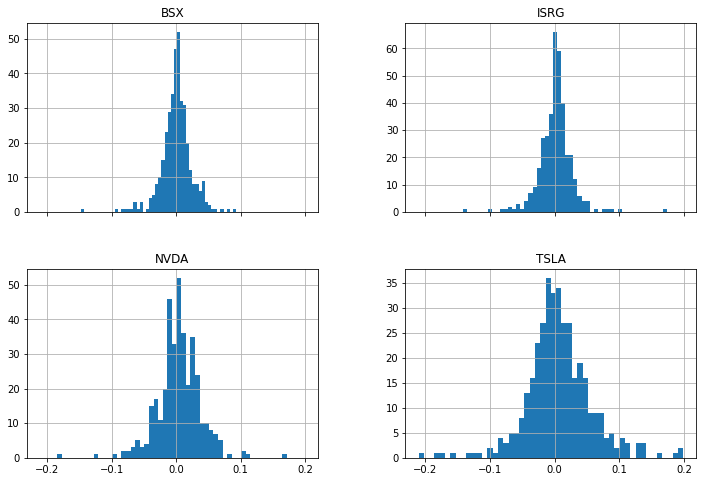

In [15]:
# Import matplotlib
import matplotlib.pyplot as plt 

# Isolate the `Adj Close` values and transform the DataFrame
daily_close_px = all_data[['adjClose']].reset_index().pivot('date', 'symbol', 'adjClose')

# Calculate the daily percentage change for `daily_close_px`
daily_pct_change = daily_close_px.pct_change()

# Plot the distributions
daily_pct_change.hist(bins=50, sharex=True, figsize=(12,8))

# Show the resulting plot
plt.show()

"Write no more than 500 words describing you results, explaining your diagrams and things that you observe"


The above histograms show the daily percentage change of the stock prices for companies Boston Dynamics (BSX), Intuitive Surgical (ISRG), NVIDIA and Tesla (TSL). The x axis shows the daily percentage change which means how much does the adjacent price changes daily. The x axis is shared with all the plots (with sharex=True) to ‘standardize’ the plots so all the plots share the same x-axis (hence the numbering is the same). The y axis shows the frequency, so how frequently does a specific daily percentage change occur (date: from 2020-1-1 to 2021-7-1). As it can be seen all plots follow a normal distribution with the mean and the mode (most frequent value) being roughly in the middle. This means that generally the daily percentage change is low since the most frequent values fall to 0 and do not show big fluctuations. 
However, there are some differences between the companies: when comparing Tesla and Boston Dynamics we can see that Tesla’s daily percentage change fluctuates more since the distribution is more spread out. The frequency is also lower so for example BSX is usually at around 0% 50 times, but Tesla is at 0 only 35 times (y axis). For BSX on the other hand (as well as ISRG) the daily percentage change is usually 0 or close to 0 meaning that the stock price does not fluctuate that much. The one that shows the most fluctuations NVIDIA which also shows a few big rises or drops frequently.
The Tesla and NVIDIA histograms also show some outliers where the adjacent price has increased and decreased by much at a specific time which especially in the case of the Tesla stocks could create a tail (on the right side). This means that the adjacent price fell at times to –0.2 or increased by 0.2. Out of all histograms Tesla seems to show the most frequent rises and falls in the daily change and BSX and ISRG show the least. That information would be useful when considering investing or betting against price moves since most companies seem to follow a normal distribution where big changes are not very likely. 


Word count: 356